## Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * Colored vessel means the doctor can see the blood passing through
    * The more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: Normal
    * 6: Fixed defect: used to be defect but ok now
    * 7: Reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [44]:
# Import the basic labraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [45]:
# Let's import our dataset
df = pd.read_csv("heart-disease.csv")

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### So there is no object type data so need for any encoding

In [49]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There is  no missing value in the| dataset 

## EDA

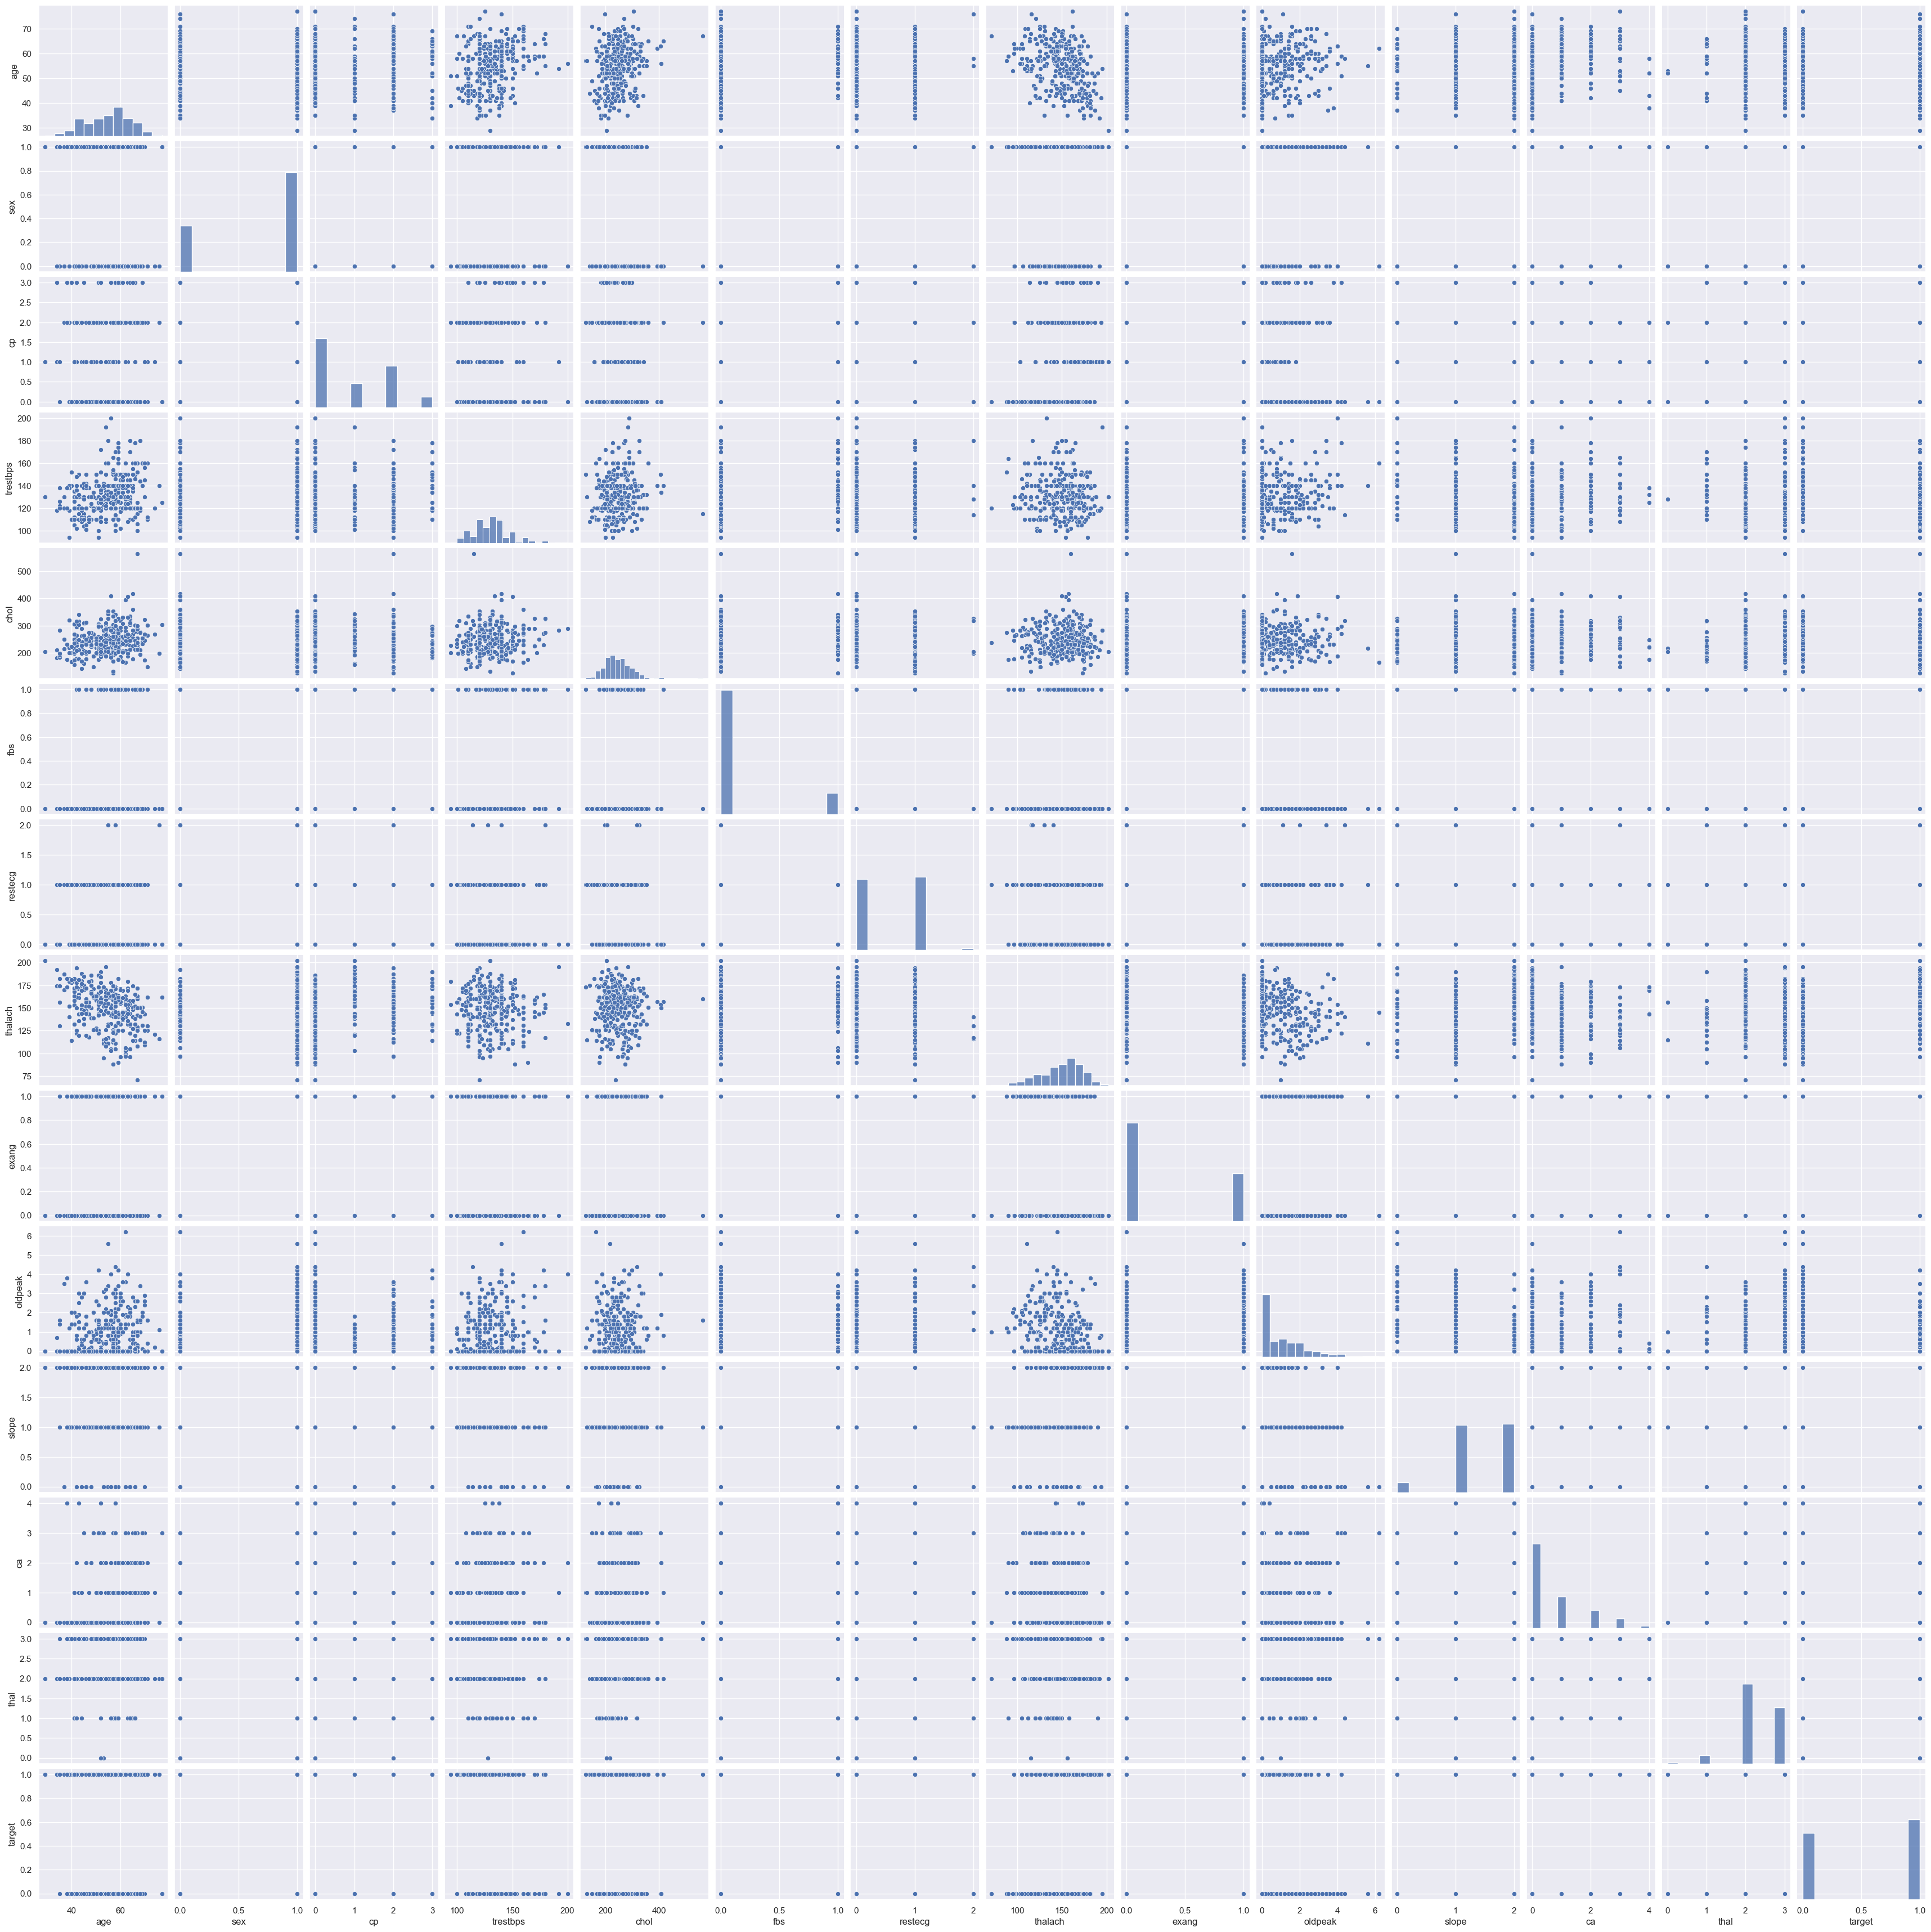

In [50]:
import seaborn as sns
sns.pairplot(df)

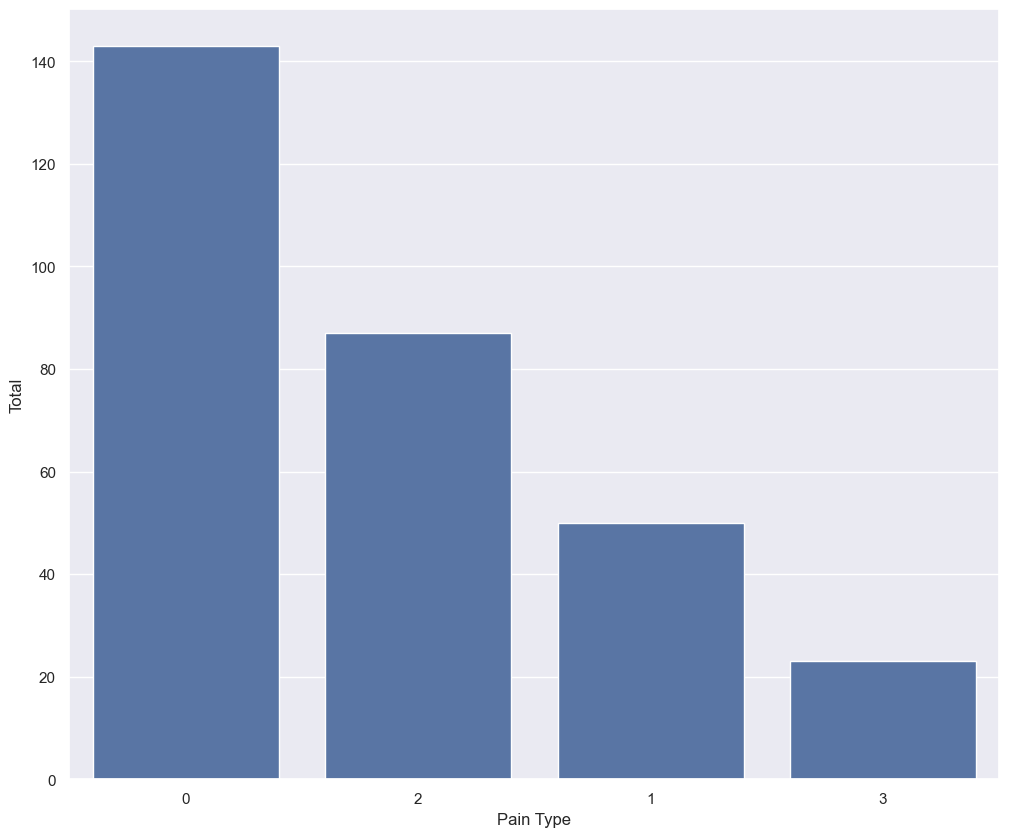

In [187]:
sns.countplot(x='cp',data=df,order=df['cp'].value_counts().index)
plt.xlabel('Pain Type')
plt.ylabel('Total')
plt.show()

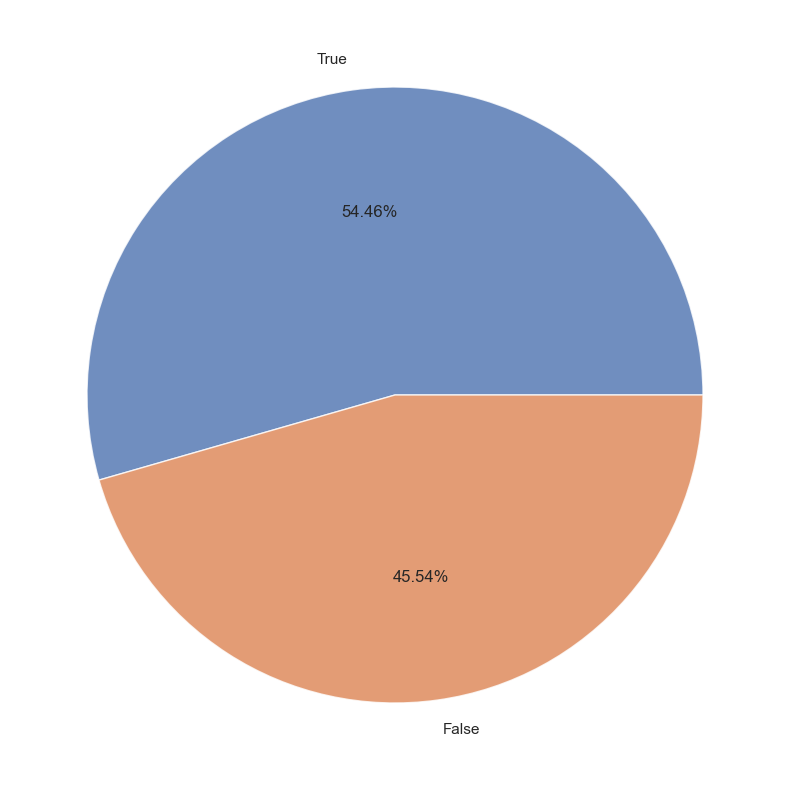

In [189]:
plt.pie(df['target'].value_counts(),labels=['True', 'False'], autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
plt.show()

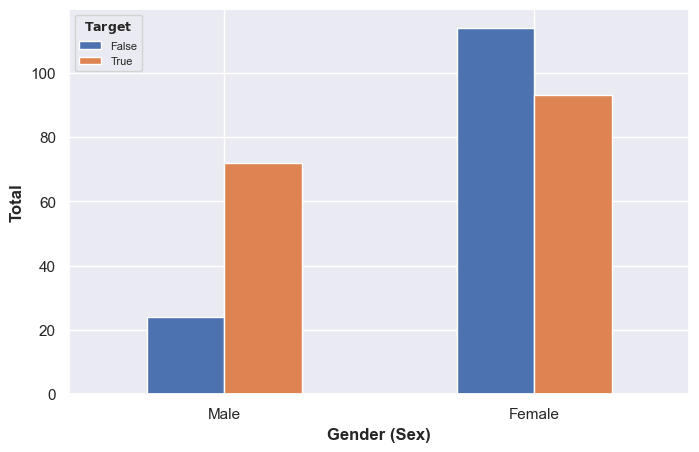

In [191]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5))
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', title_fontsize='9', loc='upper left', frameon=True);

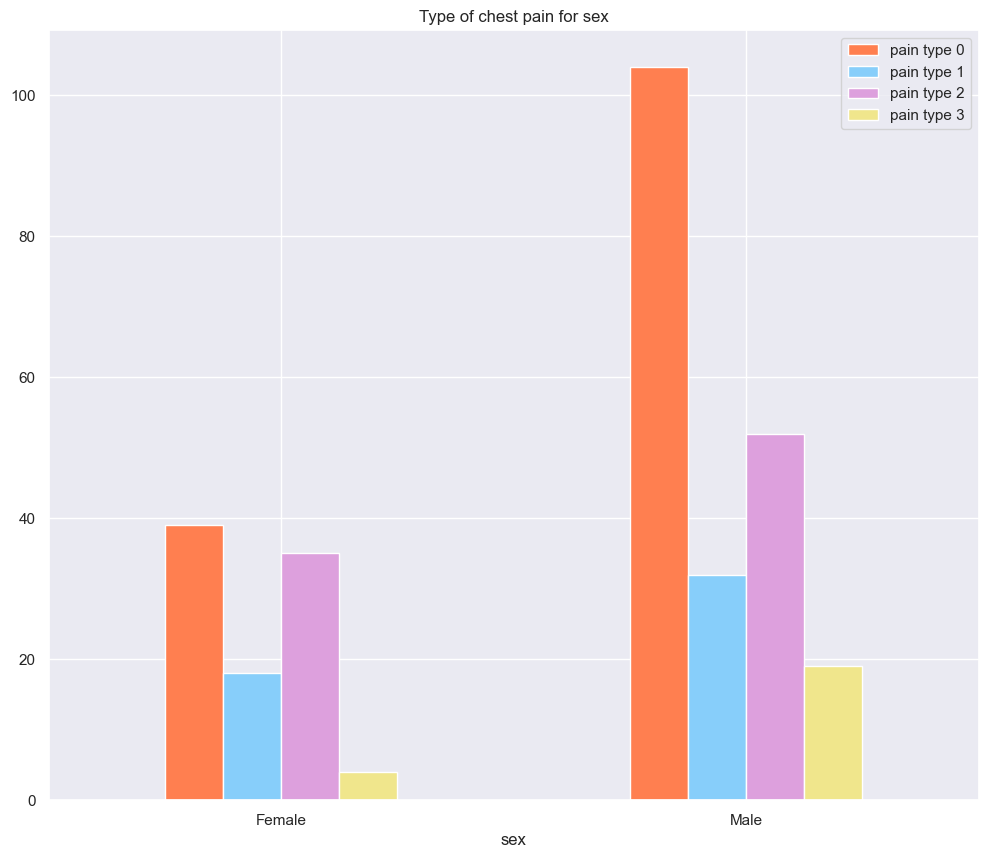

In [193]:
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

In [194]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0, 0.5, 'target')

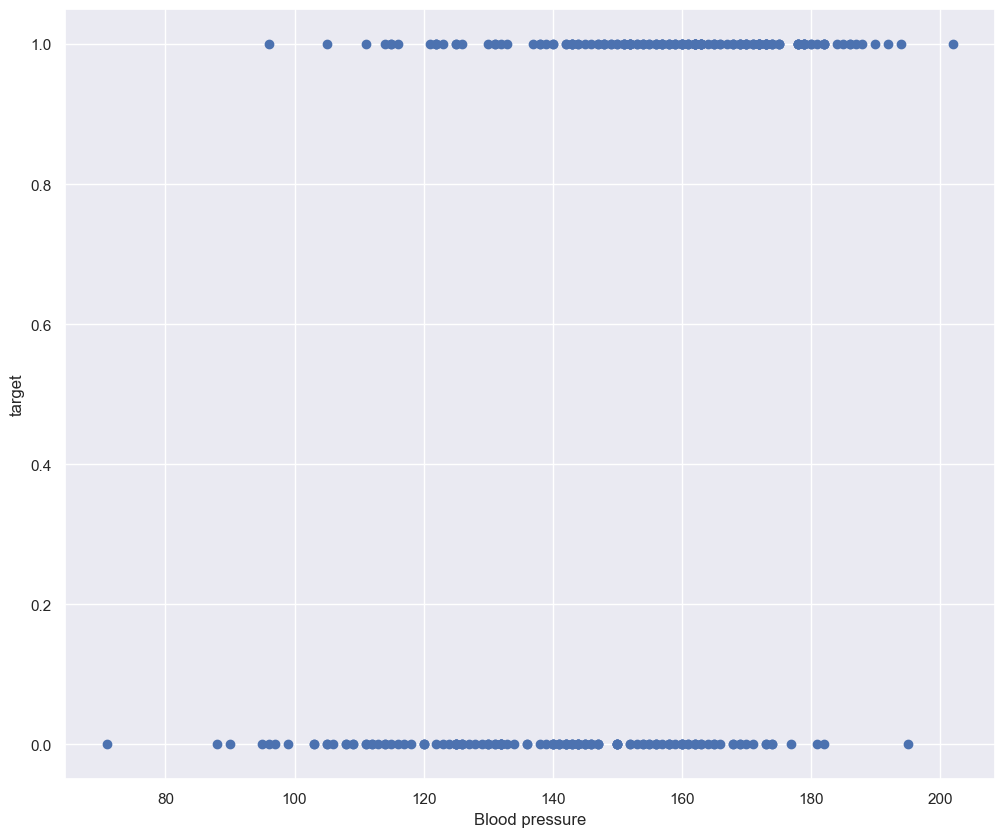

In [53]:
plt.scatter(df['thalach'],df['target'])
plt.xlabel("Blood pressure")
plt.ylabel("target")

<Axes: xlabel='trestbps', ylabel='target'>

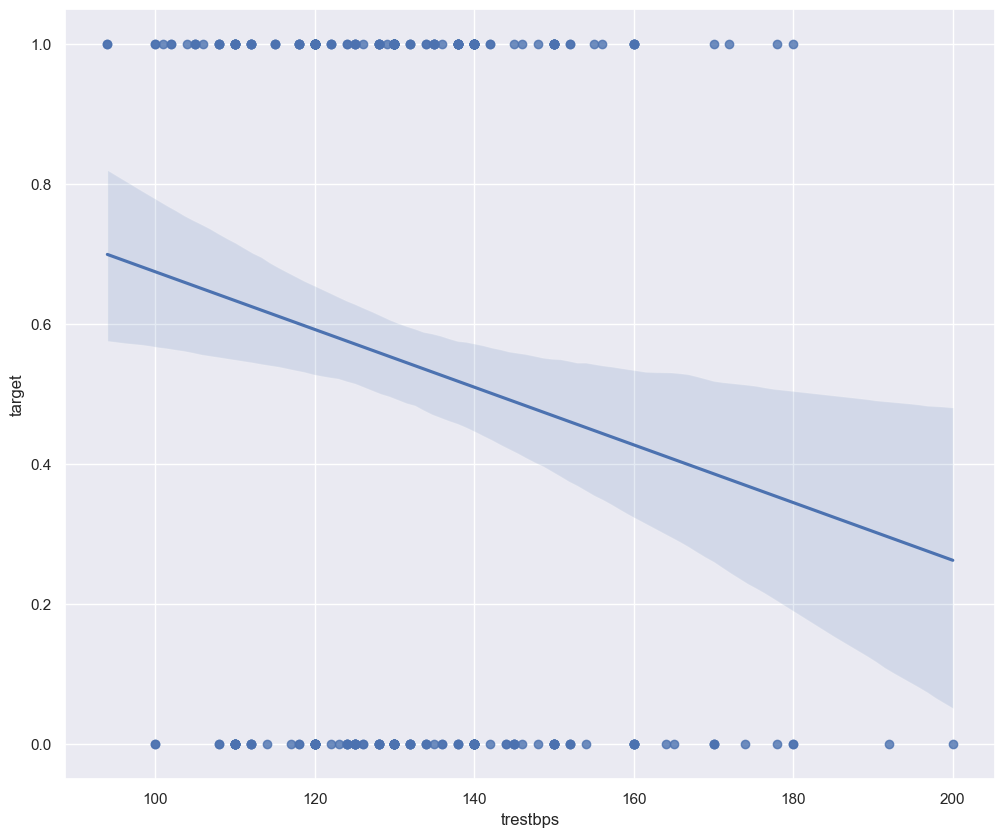

In [54]:
sns.regplot(x="trestbps",y="target",data=df)

<Axes: >

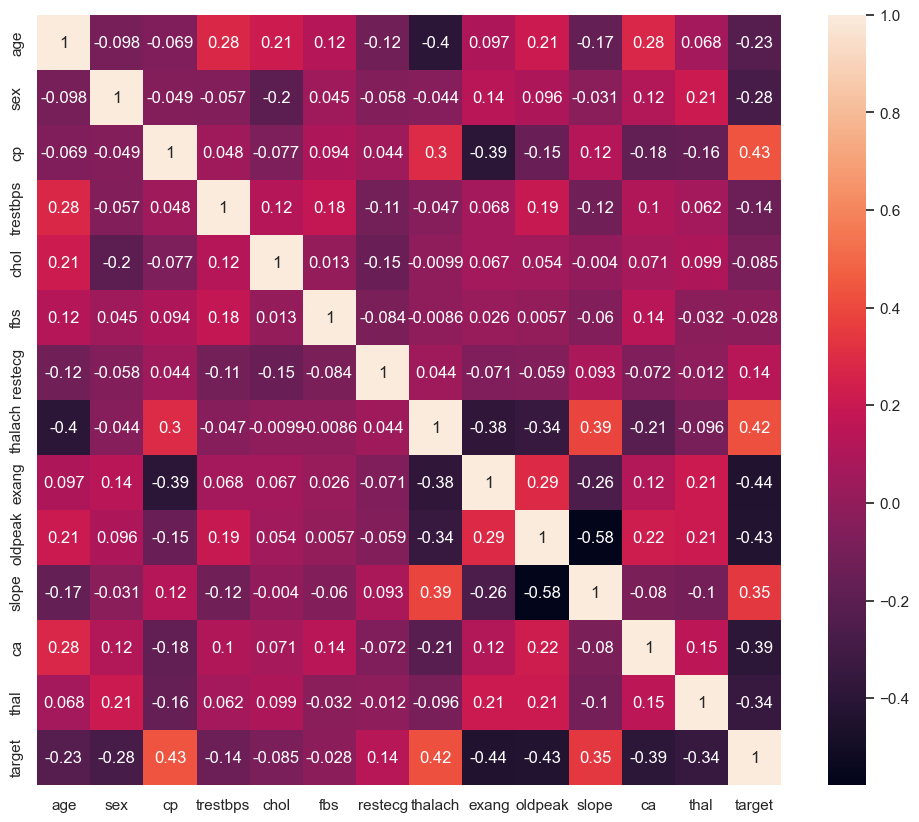

In [55]:
sns.set(rc={'figure.figsize':(12,10)})

sns.heatmap(df.corr(),annot=True)

## Modelling

In [74]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [75]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [110]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [179]:
%%time
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings("ignore")

# Function to find the best random_state for models
def find_best_random_state_for_models(models, X, y, test_size=0.3, max_random_state=200):
    results = {}
    for model_name, model in models.items():
        best_accuracy = 0
        best_random_state = 0
        for random_state in range(max_random_state):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_random_state = random_state
        results[model_name] = (best_random_state, best_accuracy)
    return results

# Assuming df is your DataFrame
df = pd.read_csv('heart-disease.csv')  # Load your dataset
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": LinearSVC(max_iter=1000),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Find the best random state for each model
best_random_states = find_best_random_state_for_models(models, X, y, test_size=0.3, max_random_state=200)

# Display the results
for model_name, (best_random_state, best_accuracy) in best_random_states.items():
    print(f"{model_name}: Best random_state = {best_random_state}, Best accuracy = {best_accuracy}")


Logistic Regression: Best random_state = 5, Best accuracy = 0.9340659340659341
KNN: Best random_state = 65, Best accuracy = 0.7472527472527473
Random Forest: Best random_state = 135, Best accuracy = 0.9120879120879121
SVM: Best random_state = 135, Best accuracy = 0.9120879120879121
Neural Network: Best random_state = 193, Best accuracy = 0.9010989010989011
CPU times: total: 3min 15s
Wall time: 1min 5s


In [180]:
from sklearn.model_selection import GridSearchCV

# Function to perform Grid Search CV
def perform_grid_search_cv(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

# Define hyperparameter grids for Grid Search
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10]  # Regularization parameter
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],  # Number of neighbors
        'weights': ['uniform', 'distance']  # Weight function used in prediction
    },
    "Random Forest": {
        'n_estimators': [50, 100, 150],  # Number of trees in the forest
        'max_depth': [None, 10, 20]  # Maximum depth of the trees
    },
    "SVM": {
        'C': [0.1, 1, 10],  # Regularization parameter
        'loss': ['hinge', 'squared_hinge']  # Loss function
    },
    "Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Number of neurons in each hidden layer
        'activation': ['relu', 'tanh'],  # Activation function
        'solver': ['adam', 'sgd']  # Optimization algorithm
    }
}

# Perform Grid Search CV for each model with the best random state
for model_name, (best_random_state, _) in best_random_states.items():
    print(f"\nEvaluating {model_name} with best random_state = {best_random_state}")
    
    # Split data with the best random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=best_random_state)
    
    # Get the model and hyperparameter grid
    model = models[model_name]
    param_grid = param_grids[model_name]
    
    # Perform Grid Search CV
    best_params, best_score = perform_grid_search_cv(model, param_grid, X_train, y_train)
    print(f"  Best Parameters: {best_params}")
    print(f"  Best Cross-Validation Score: {best_score}")
    
    # Evaluate the model with the best parameters on the test set
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"  Test Accuracy: {test_accuracy}\n")




Evaluating Logistic Regression with best random_state = 5
  Best Parameters: {'C': 10}
  Best Cross-Validation Score: 0.7836101882613511
  Test Accuracy: 0.9120879120879121


Evaluating KNN with best random_state = 65
  Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
  Best Cross-Validation Score: 0.603875968992248
  Test Accuracy: 0.6593406593406593


Evaluating Random Forest with best random_state = 135
  Best Parameters: {'max_depth': 20, 'n_estimators': 150}
  Best Cross-Validation Score: 0.7975636766334441
  Test Accuracy: 0.9120879120879121


Evaluating SVM with best random_state = 135
  Best Parameters: {'C': 1, 'loss': 'squared_hinge'}
  Best Cross-Validation Score: 0.7500553709856035
  Test Accuracy: 0.9120879120879121


Evaluating Neural Network with best random_state = 193
  Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
  Best Cross-Validation Score: 0.7501661129568106
  Test Accuracy: 0.7472527472527473

